In [2]:
# Create imports
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt
import fiona

In [3]:
# Pull in dataframe for reading zip code coordinates
zc_df = pd.read_csv('Resources/zip-code-coordinates.csv')
zc_df

,Vote,Zip Code,Latitude,Longitude
0,0,19114,40.0686,-75.0027
1,1,19145,39.9081,-75.1954
2,2,19142,39.9227,-75.2304
3,3,19140,40.0125,-75.1487
4,4,19147,39.9351,-75.1516
5,5,19124,40.0149,-75.0903
6,6,19136,40.0358,-75.0202
7,7,19115,40.0891,-75.0436
8,8,19153,39.8782,-75.2362
9,9,99801,58.3018,-134.4203


In [4]:
# Transition dataframe to create geometic points using Geopandas
geometry = geopandas.points_from_xy(zc_df.Longitude, zc_df.Latitude)
geo_df = geopandas.GeoDataFrame(zc_df[['Vote', 'Zip Code', 'Latitude', 'Longitude']], geometry=geometry)
gdf = geopandas.GeoDataFrame(geo_df, geometry=geopandas.points_from_xy(geo_df.Longitude, geo_df.Latitude))
print(gdf.head())

   Vote  Zip Code  Latitude  Longitude                    geometry
0     0     19114   40.0686   -75.0027  POINT (-75.00270 40.06860)
1     1     19145   39.9081   -75.1954  POINT (-75.19540 39.90810)
2     2     19142   39.9227   -75.2304  POINT (-75.23040 39.92270)
3     3     19140   40.0125   -75.1487  POINT (-75.14870 40.01250)
4     4     19147   39.9351   -75.1516  POINT (-75.15160 39.93510)


In [5]:
# Pull in world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

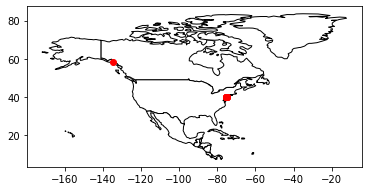

In [8]:
# Restrict world map to North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')
# Points plotted overtop the North American map.
gdf.plot(ax=ax, color='red')
plt.show()